# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Logistic Regression***, ***Random Forest Classifier***, ***XGBoost Classifier***, ***ANN***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Distance Based and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data
- Built XGBoost Classifier, Evaluate Model Performance and Predict Test Data
- Built ANN Classifier, Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Best Model
- Save and Export Variables
- Deploy best model via Streamlit

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [2]:
df0 = pd.read_csv('HR_Dataset.csv')

In [3]:
df0

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Moreover, you can find the average of both the groups using groupby() and mean() function.

In [5]:
df = df0.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
left = df.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Employees who left the company had low satisfaction level, low promotion rate, 
low salary, and worked more compare to who stayed in the company.

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

*Feel free to add more visualization

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

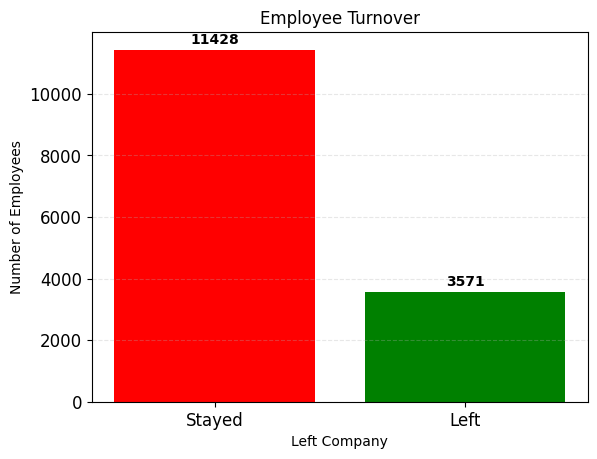

In [51]:
left_count = df.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'], color=['red', 'green'])
plt.title('Employee Turnover')
plt.xlabel('Left Company')
plt.ylabel('Number of Employees')
plt.xticks([0,1], ['Stayed', 'Left'])
plt.yticks(range(0, 12000, 2000))
plt.tick_params(axis='both', labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

for i, v in enumerate(left_count['satisfaction_level']):
    plt.text(i, v+200, str(v), color='black', ha='center', fontweight='bold')

plt.show()


### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

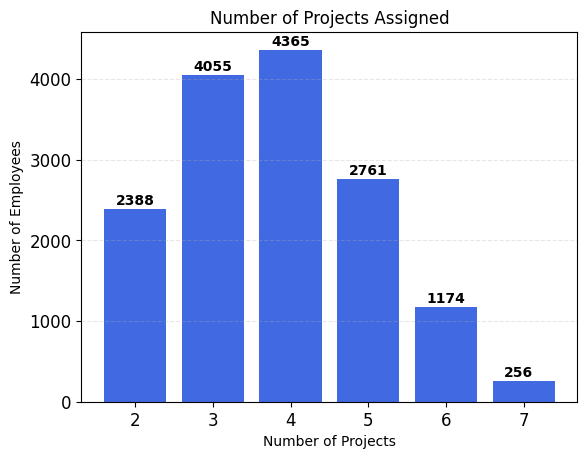

In [50]:
num_projects = df.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'], color='royalblue')
plt.title('Number of Projects Assigned')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.xticks(range(2, 8))
plt.yticks(range(0, 5000, 1000))
plt.tick_params(axis='both', labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Grafik üzerinde değerleri yazdırmak
for i, v in enumerate(num_projects['satisfaction_level']):
    plt.text(num_projects.index.values[i]-0.25, v+50, str(v), color='black', fontweight='bold')

plt.show()


### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


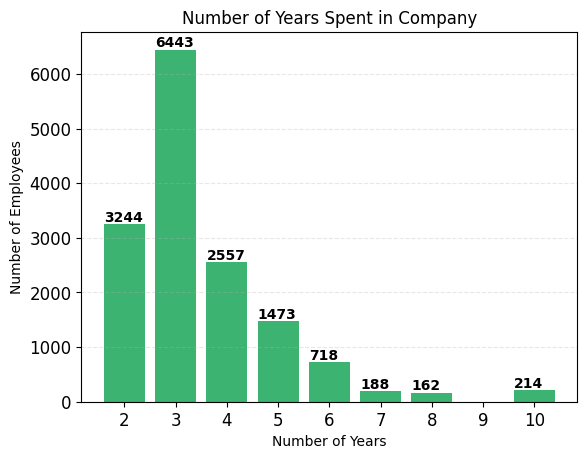

In [49]:
time_spent = df.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'], color='mediumseagreen')
plt.title('Number of Years Spent in Company')
plt.xlabel('Number of Years')
plt.ylabel('Number of Employees')
plt.xticks(range(2, 11))
plt.yticks(range(0, 7000, 1000))
plt.tick_params(axis='both', labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

for i, v in enumerate(time_spent['satisfaction_level']):
    plt.text(time_spent.index.values[i]-0.4, v+50, str(v), color='black', fontweight='bold')

plt.show()


Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.

### Subplots of Features

You can use the methods of the matplotlib.

In [62]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


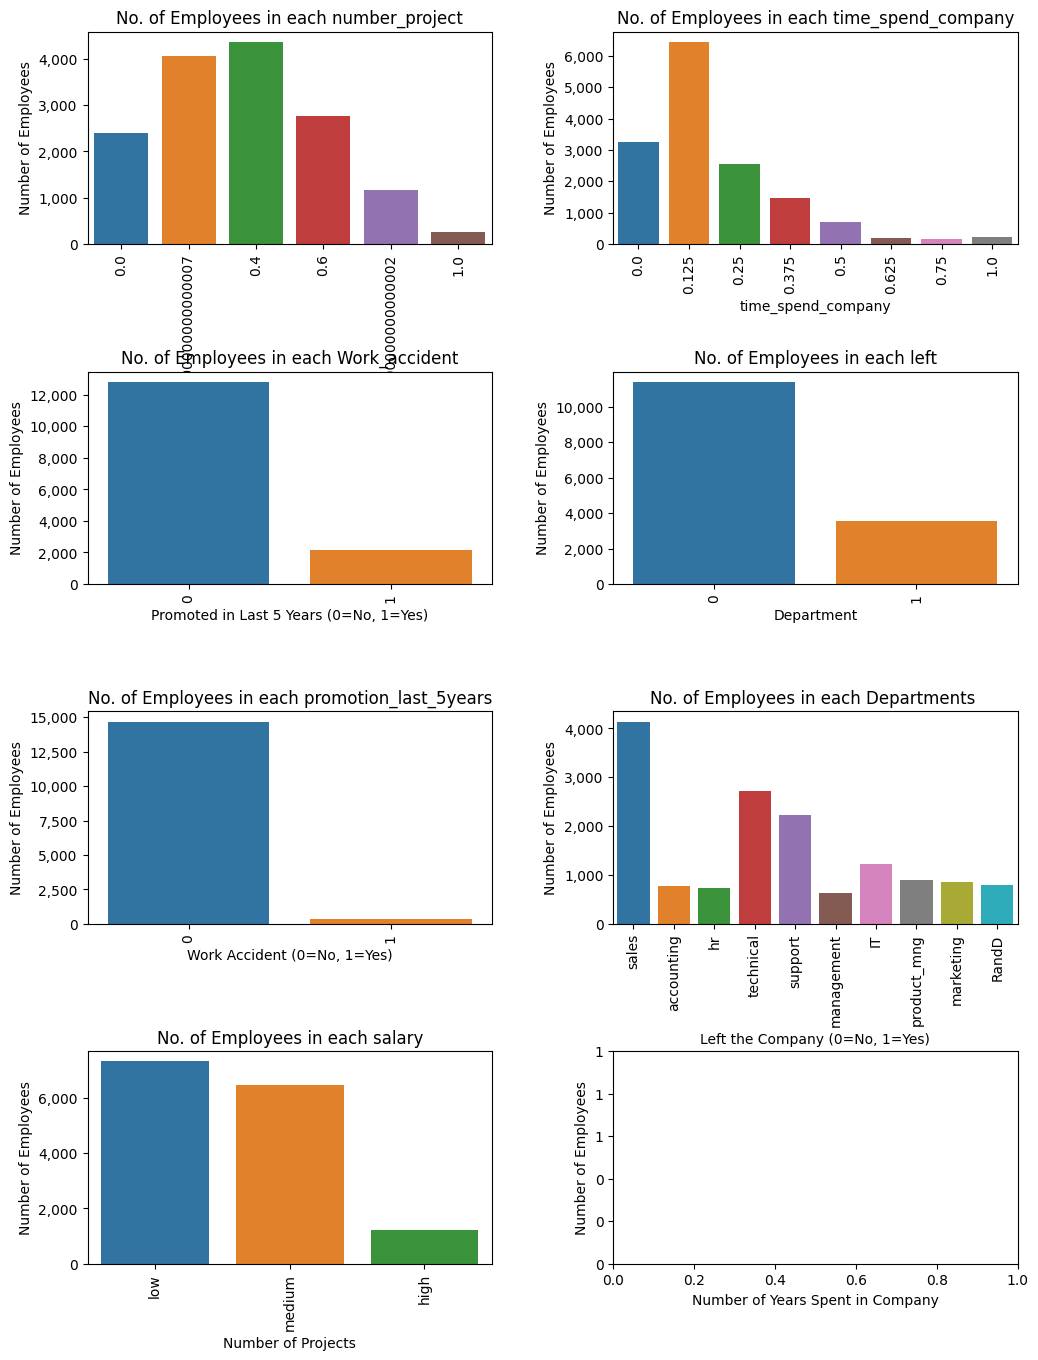

In [80]:
features = ['number_project', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Departments ', 'salary']
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
plt.subplots_adjust(hspace=0.6, wspace=0.3)

for i, j in enumerate(features):
    row = i // 2
    col = i % 2
    ax = axes[row][col]
    sns.countplot(x=j, data=df, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title("No. of Employees in each " + j)

# X ve Y ekseni etiketleri eklendi
axes[3, 0].set_xlabel('Number of Projects')
axes[3, 1].set_xlabel('Number of Years Spent in Company')
axes[2, 0].set_xlabel('Work Accident (0=No, 1=Yes)')
axes[2, 1].set_xlabel('Left the Company (0=No, 1=Yes)')
axes[1, 0].set_xlabel('Promoted in Last 5 Years (0=No, 1=Yes)')
axes[1, 1].set_xlabel('Department')
axes[0, 0].set_xlabel('Salary')
for i in range(4):
    for j in range(2):
        axes[i, j].set_ylabel('Number of Employees')

# Y eksenindeki sayıların formatı ayarlandı
formatter = mticker.StrMethodFormatter('{x:,.0f}')
for i in range(4):
    for j in range(2):
        axes[i, j].yaxis.set_major_formatter(formatter)

plt.show()


You can observe the following points in the above visualization:

-Most of the employee is doing the project from 3-5.

-There is a huge drop between 3 years and 4 years experienced employee.

-The no of employee left is 23 % of the total employment.

-A decidedly less number of employee get the promotion in the last 5 year.

-The sales department is having maximum no.of employee followed by technical and support

-Most of the employees are getting salary either medium or low.

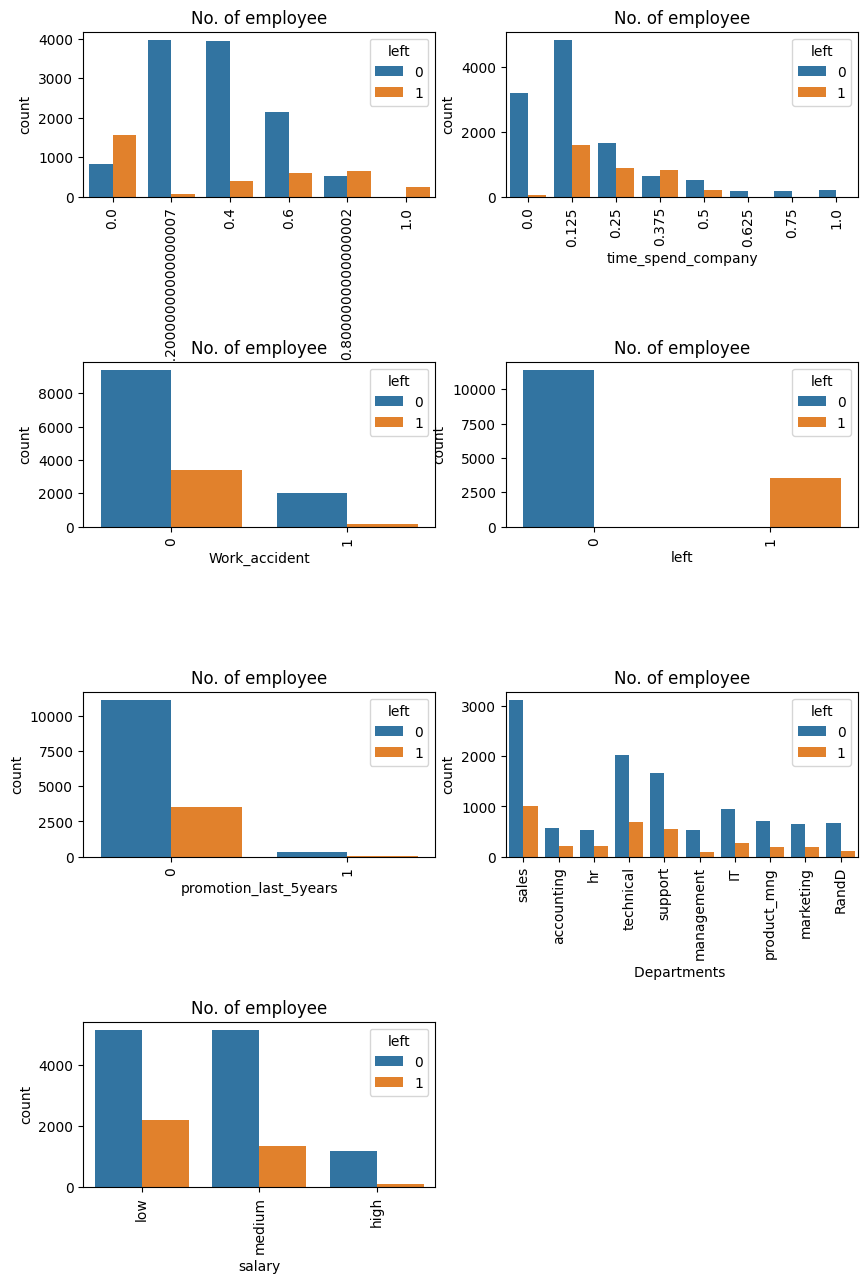

In [81]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")


You can observe the following points in the above visualization:

Those employees who have the number of projects more than 5 were left the company.

The employee who had done 6 and 7 projects, left the company it seems to like that they were 
overloaded with work.

The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.

Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

Balance olmadigi icin normalization

In [77]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler object olustur
scaler = MinMaxScaler()

# scale edilecek columnlari belirle
scale_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

# belirlenen columnlari normalize et
df[scale_columns] = scaler.fit_transform(df[scale_columns])


#### Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [82]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df['salary']=le.fit_transform(df['salary'])
df['Departments ']=le.fit_transform(df['Departments '])

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

## 5. Model Building

### Split Data as Train and Test Set

In [83]:
X = df.drop("left", axis =1)
y = df["left"]

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=87)  # 70% training and 30% test

### #Distance Based(?) Algorithm

#### Model Building

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

# KNN distance-mesafe tabanlı bir model olduğundan datayı mutlaka scale etmeliyiz.

KNeighborsClassifier()

#### Evaluating Model Performance and Tuning

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

In [91]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [93]:
y_pred_proba = model.predict_proba(X_test)

In [99]:
from sklearn.metrics import confusion_matrix, classification_report

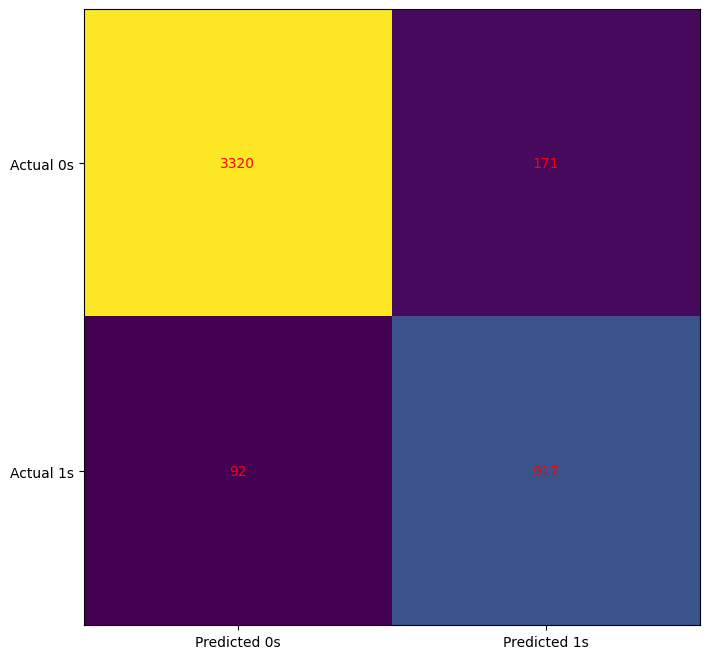

In [100]:
# confusion matrix oluşturma
cm = confusion_matrix(y_test, y_pred)

# plot oluşturma
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [101]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [103]:
eval_metric(model, X_train, y_train, X_test, y_test)

Test_Set
[[3320  171]
 [  92  917]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3491
           1       0.84      0.91      0.87      1009

    accuracy                           0.94      4500
   macro avg       0.91      0.93      0.92      4500
weighted avg       0.94      0.94      0.94      4500


Train_Set
[[7692  245]
 [ 186 2376]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7937
           1       0.91      0.93      0.92      2562

    accuracy                           0.96     10499
   macro avg       0.94      0.95      0.94     10499
weighted avg       0.96      0.96      0.96     10499



Test Set Sonuçları:

3320 gerçek sınıfı 0 olan örnek doğru bir şekilde tahmin edilmiş (true negatives)
917 gerçek sınıfı 1 olan örnek doğru bir şekilde tahmin edilmiş (true positives)
171 gerçek sınıfı 0 olan örnek yanlış bir şekilde tahmin edilmiş (false positives)
92 gerçek sınıfı 1 olan örnek yanlış bir şekilde tahmin edilmiş (false negatives)
Bu sonuçlar, test veri setindeki 4500 örneğin 94% doğru bir şekilde sınıflandırıldığını gösterir.

Precision, recall ve f1-score gibi performans ölçüleri, sınıflandırma modelinin ne kadar doğru ve eksiksiz olduğunu ölçer. "Precision" doğru pozitif tahminlerin oranını, "recall" doğru pozitif tahmin edilen örneklerin gerçek sınıfın tüm örneklerine oranını ve "f1-score" ise precision ve recall değerlerinin harmonik ortalamasını gösterir.

Train Set Sonuçları:

7692 gerçek sınıfı 0 olan örnek doğru bir şekilde tahmin edilmiş (true negatives)
2376 gerçek sınıfı 1 olan örnek doğru bir şekilde tahmin edilmiş (true positives)
245 gerçek sınıfı 0 olan örnek yanlış bir şekilde tahmin edilmiş (false positives)
186 gerçek sınıfı 1 olan örnek yanlış bir şekilde tahmin edilmiş (false negatives)
Bu sonuçlar, eğitim veri setindeki 10499 örneğin 96% doğru bir şekilde sınıflandırıldığını gösterir.

Özetle, bu sonuçlar modelin iyi bir performans sergilediğini gösterir. Ancak, false positive ve false negative değerleri göz önüne alındığında, modelin bazı durumlarda yanlış tahminler yapabileceğini göstermektedir. Bu yanlış tahminlerin nedenleri, veri setinin dengesizliği, yanlış özellik seçimi veya modelin uyumsuzluğu gibi faktörlere bağlı olabilir. Bu nedenle, modelin daha iyi bir performans göstermesi için farklı veri özelliklerini veya model parametrelerini denemek gerekebilir.

#### Prediction

In [ ]:
?

### #Random Forest Classifier

#### Model Building

In [105]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=101)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

#### Evaluating Model Performance and Tuning

In [106]:
eval_metric(model, X_train, y_train, X_test, y_test)

Test_Set
[[3483    8]
 [  30  979]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3491
           1       0.99      0.97      0.98      1009

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500


Train_Set
[[7937    0]
 [   0 2562]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7937
           1       1.00      1.00      1.00      2562

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499



In [108]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.989332
train_accuracy           1.000000
test_precision_micro     0.989332
train_precision_micro    1.000000
test_recall_micro        0.989332
train_recall_micro       1.000000
test_f1_micro            0.989332
train_f1_micro           1.000000
dtype: float64

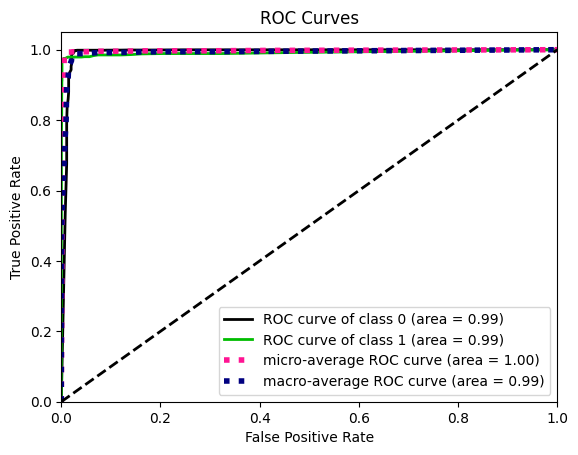

In [109]:
from scikitplot.metrics import plot_roc, precision_recall_curve

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

# model genel performansı çok yüksek doğal olarakta classları birbirlerinden ayırmakta çok başarılı.

In [114]:
# Özellik önem sıralaması
feature_importance = model.feature_importances_

# Özellik isimleri
feature_names = X.columns

# Özellik önem sıralamasını özellik isimleri ile eşleştirme
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Özellik önem sıralamasını yazdırma
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f'{feature}: {importance}')

satisfaction_level: 0.3050538757873337
number_project: 0.195587778629783
time_spend_company: 0.1878901024541845
average_montly_hours: 0.15832843516967823
last_evaluation: 0.12429318682829735
Departments : 0.013031218917304655
salary: 0.009250098872842488
Work_accident: 0.005468498184498364
promotion_last_5years: 0.0010968051560777466


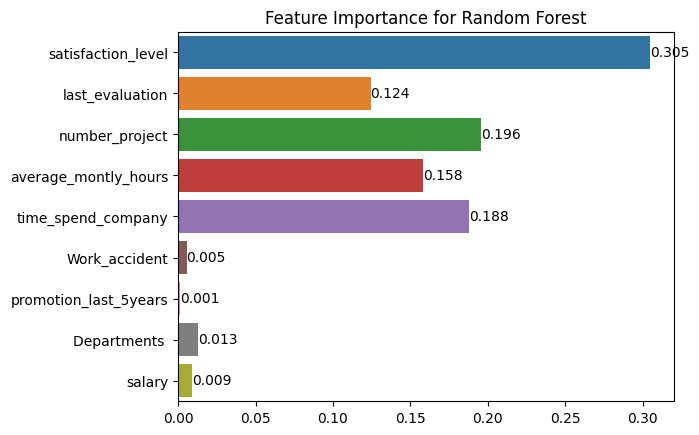

In [120]:
# Özellik isimleri ve önem sıralamalarını listelere dönüştürme
feature_names = list(feature_importance_dict.keys())
importances = list(feature_importance_dict.values())

# Bar grafik oluşturma
ax = sns.barplot(x=importances, y=feature_names)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

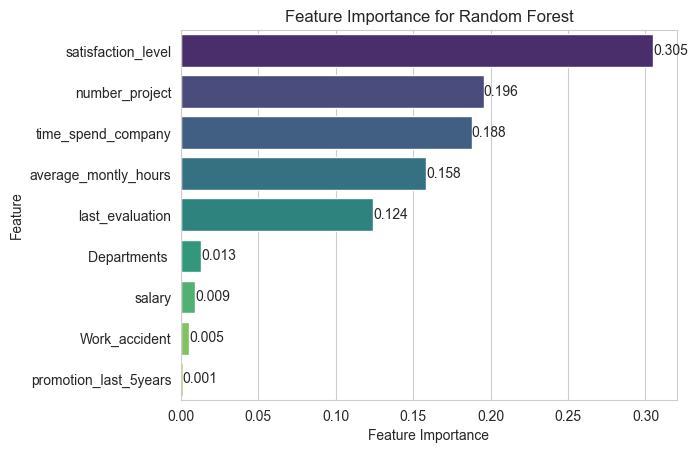

In [124]:
# Özellik isimleri ve önem sıralamalarını listelere dönüştürme
feature_names = list(feature_importance_dict.keys())
importances = list(feature_importance_dict.values())

# Veri çerçevesi oluşturma
df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Özellik önem sıralamasına göre çubuk grafik oluşturma
sns.set_style('whitegrid')
df_sorted = df.sort_values('Importance', ascending=False)
ax = sns.barplot(x='Importance', y='Feature', data=df_sorted, palette='viridis')
ax.set(xlabel='Feature Importance', ylabel='Feature', title="Feature Importance for Random Forest")

# Çubukların üzerindeki değerleri yazdırma
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.show()

In [125]:
# Random Forest sınıflandırıcısını tanımlama
rf = RandomForestClassifier(random_state=42)

# GridSearchCV için parametrelerin belirlenmesi
param_grid = {'n_estimators': [100, 500, 1000],
              'max_depth': [None, 10, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# GridSearchCV nesnesinin tanımlanması
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# GridSearchCV nesnesinin veri setine uydurulması
grid_search.fit(X, y)

# En iyi parametreleri yazdırma
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


#### Prediction

### #XGBoost Classifier

#### Model Building

#### Evaluating Model Performance and Tuning

#### Prediction

### #ANN Classifier

#### Layer Architecture Building and Compiling

#### Evaluating Model Performance and Tunning

#### Prediction

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model

### Save and Export Variables


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___